<a href="https://colab.research.google.com/github/vijaya-wadhai/Capstone_project/blob/main/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset (Local File)


In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')

# 3. Basic Info


In [3]:
print(df.head())
print(df.info())
print(df.describe())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# 4. Check null values


In [4]:
print(df.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# 5. Target variable distribution


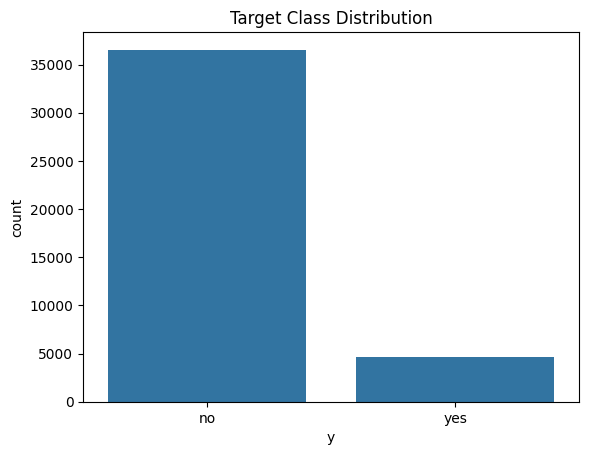

In [5]:
sns.countplot(x='y', data=df)
plt.title("Target Class Distribution")
plt.show()


# 6. Encode Categorical Columns


In [6]:
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# 7. Target Split


In [7]:
X = df.drop('y', axis=1)
y = df['y']


# 8. Train-Test Split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 9. Model 1: Random Forest


In [9]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))



Random Forest Accuracy: 0.9142995872784656


# 10. Model 2: Logistic Regression


In [10]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9104151493080845


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 11. Confusion Matrix & Report


In [11]:
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("Logistic Regression Report:\n", classification_report(y_test, lr_pred))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



# 12. Challenges faced:


In [ ]:

# - Categorical values encoding
# - Class imbalance in target variable (more 'no' than 'yes')
# - Duration column should be removed for real-world use (as mentioned)


# 13. Suggestions:



In [ ]:
# - Target high-duration calls or improve call quality
# - Use previous campaign success data
# - Focus on customer groups based on age, job, education
